<a href="https://colab.research.google.com/github/Sanyok2/Laba2/blob/master/Laba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 1. Подключение нужных для работы моделей
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [3]:
# 2. Получение и чтение файла из облака
# адрес - когда копируете ссылку из Google drive, она выглядит обычно вот так:
#   https://drive.google.com/open?id=1FoSS-guXOsGUbE0xHcKR-E9ZEaTmc9Wv
# или так:
#   https://drive.google.com/file/d/1FoSS-guXOsGUbE0xHcKR-E9ZEaTmc9Wv/view?usp=sharing
# чтобы обрабатывать данные в программе, нужно ссылку переделать в следующий вид:
#   https://drive.google.com/uc?export=download&id=...
# то есть взять id из ссылки, как ее дал Google Drive и вставить в шаблон https://drive.google.com/open?id=
url = "https://drive.google.com/uc?export=download&id=1XFViS21mLmAnVUqzVsMYgxZUPw6sYn00"

# чтение данных, можно указать символ разделения столбцов (sep) и многие другие параметры, 
# index_col показывает, какой столбец нужно использовать как индекс строки в таблице
input_df = pd.read_csv(url)

# вывод заголовка таблицы и первых пяти строк (сэмплов)
input_df.head()

,Wind_power_MW,Solar_power_kW,Consumption_MW
0,65.655516,0.0000,34.70
1,69.111069,0.0000,32.79
2,72.134678,178.6368,33.09
3,75.590232,721.5360,33.63
4,68.247181,3752.5248,34.51


In [4]:
# 3. Просмотр последних строк таблицы
input_df.tail()

,Wind_power_MW,Solar_power_kW,Consumption_MW
8755,128.719366,0.0,45.47
8756,129.583255,0.0,40.72
8757,130.447143,0.0,39.11
8758,132.606864,0.0,36.91
8759,134.766585,0.0,35.58


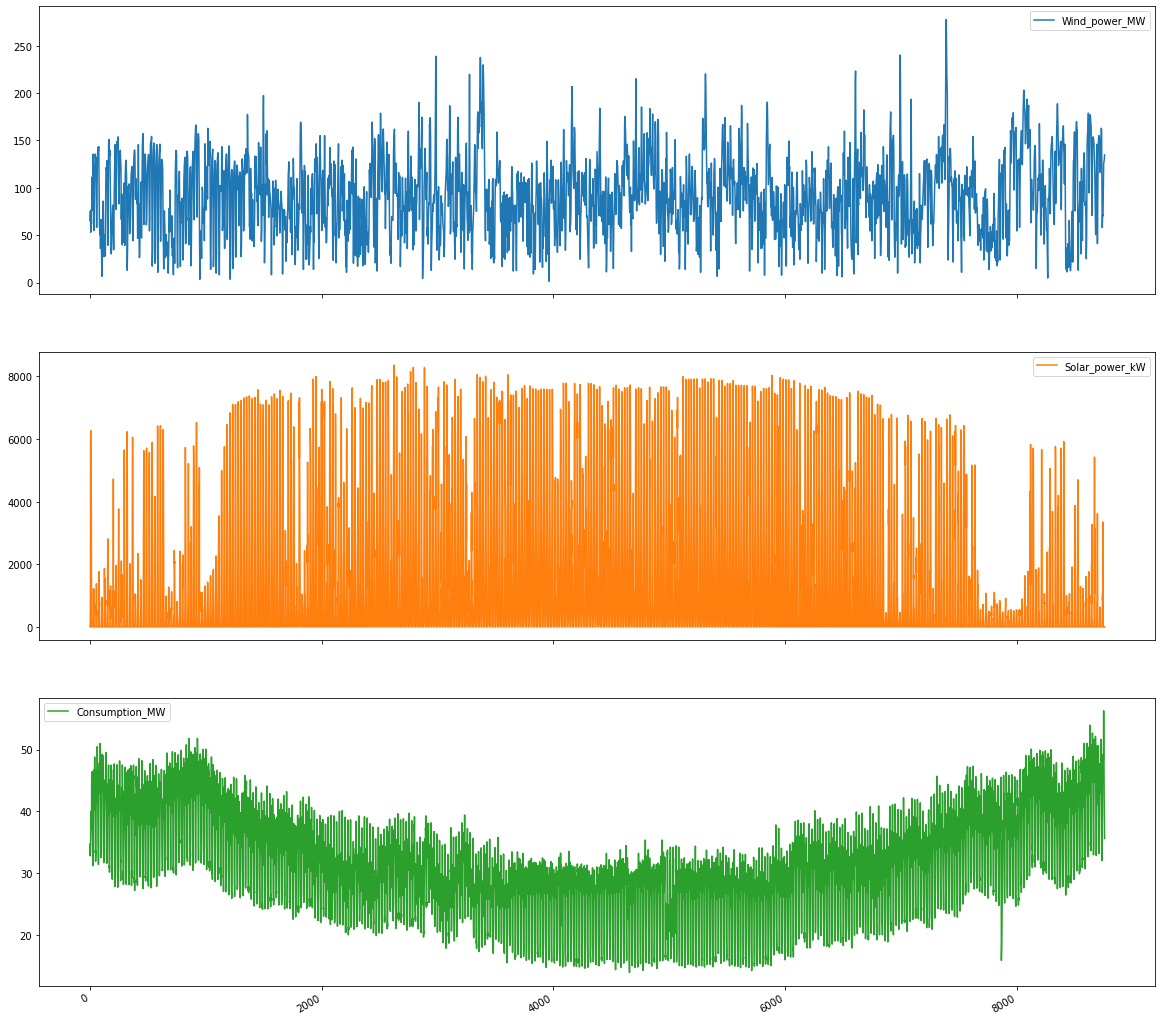

In [5]:
# 5. Можно сразу построить графики

axes = input_df.plot(marker=None, figsize=(20, 20), subplots = True)

(8760,)
(8760,)
(8760,)
(8760,)
(8760,)


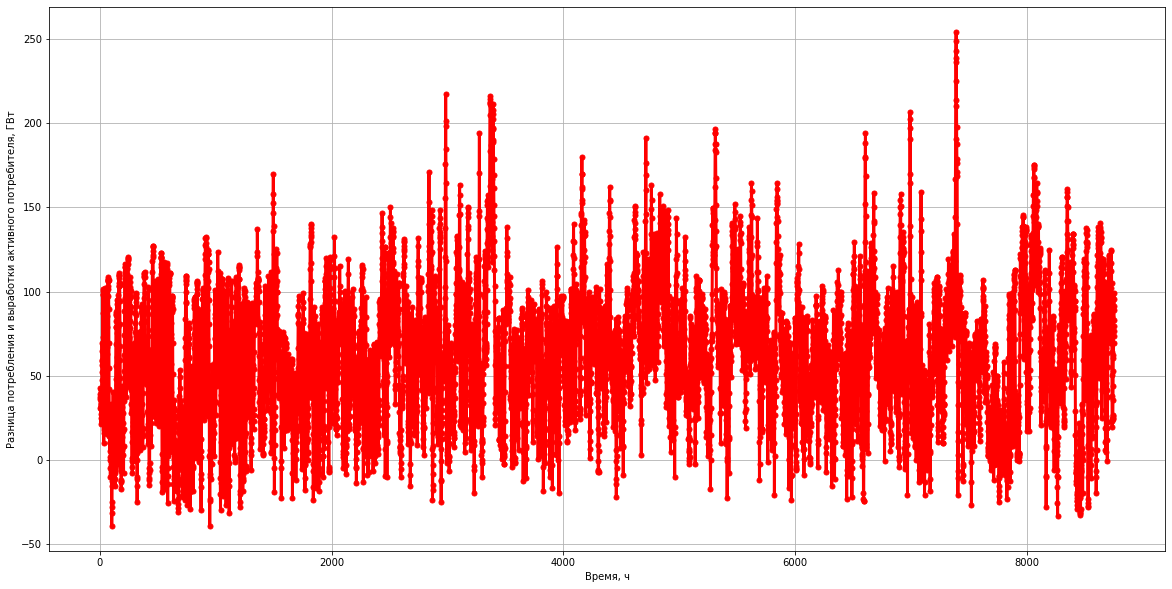

In [9]:
# 3. Берем только временной ряд скорости ветра в м/с
# iloc - выделяет из таблицы указанный фрагмент, в данном случае все строки и только первый столбец
wind_power = input_df.iloc[: , 0].values
solar_power = input_df.iloc[: , 1].values
consumption = input_df.iloc[: , 2].values

print(wind_power.shape)
print(solar_power.shape)
print(consumption.shape)

windsolar_power = wind_power + (solar_power/1000)
print(windsolar_power.shape)

raznica = windsolar_power - consumption
print(raznica.shape)

fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(raznica, linewidth = 3, markersize = 5, marker = 'o', color = 'red')

ax.grid(True)
ax.set_xlabel('Время, ч')
ax.set_ylabel('Разница потребления и выработки активного потребителя, МВт')

plt.show()

In [12]:
# Рассмотрим одну из них - Bokeh 
#https://docs.bokeh.org/en/latest/docs/user_guide/plotting.html

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(raznica)), raznica, line_width = 2)

show(p)

In [0]:
data_frame = pd.DataFrame(raznica)
data_frame.to_excel('raznica.xlsx', index = False, header = ['raznica_MWh'])
data_frame.to_csv('raznica.csv', index = False, header = ['raznica_Mwh'])